by 
Massimo Buranel,
Brian Dastroy,
Patrick Zeni

In this file, we implement a new method of calculating the Living Standard index from a number of other variables.
We then analyse the historical data of the living standard by province in Belgium with the use of graphs and maps.
Finally, we create a model for the future forecast of the Living Standard index.

DATA RETRIEVAL

We first load the various excel data extracted from the https://statbel.fgov.be/en database

These are the national data for the Consumer price index, Inflation and the Health index

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

file_path = r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\consumer, inflation, health.xlsx"
data_frame = pd.read_excel(file_path)
print(data_frame)

    Year  Consumer price index  Inflation  Health index  \
0   1920              1.980833        NaN           NaN   
1   1921              1.738333  -0.125628           NaN   
2   1922              1.624167  -0.063218           NaN   
3   1923              1.863333   0.141104           NaN   
4   1924              2.178333   0.172043           NaN   
..   ...                   ...        ...           ...   
93  2019            108.780000   0.014360        108.92   
94  2020            109.590000   0.007446        110.00   
95  2021            112.260000   0.024364        112.21   
96  2022            123.030000   0.095938        122.59   
97  2023            127.320000        NaN        127.34   

    Health index (moving average)  Index without petrol products  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                  

We only select data from 2010 onwards

In [3]:
Years = data_frame[data_frame['Year'] >= 2010]

print(Years)

    Year  Consumer price index  Inflation  Health index  \
84  2010                 92.88   0.021782         93.37   
85  2011                 96.17   0.035422         96.22   
86  2012                 98.90   0.028387         98.77   
87  2013                100.00   0.011122        100.00   
88  2014                100.34   0.003400        100.40   
89  2015                100.90   0.005581        101.45   
90  2016                102.89   0.019722        103.58   
91  2017                105.08   0.021285        105.49   
92  2018                107.24   0.020556        107.35   
93  2019                108.78   0.014360        108.92   
94  2020                109.59   0.007446        110.00   
95  2021                112.26   0.024364        112.21   
96  2022                123.03   0.095938        122.59   
97  2023                127.32        NaN        127.34   

    Health index (moving average)  Index without petrol products  \
84                            NaN             

We select the columns we are interested in, those relating to the year, the consumer price index, inflation and the Health index.

In [4]:
table = Years[['Year', 'Consumer price index', 'Inflation', 'Health index']]
print(table)

    Year  Consumer price index  Inflation  Health index
84  2010                 92.88   0.021782         93.37
85  2011                 96.17   0.035422         96.22
86  2012                 98.90   0.028387         98.77
87  2013                100.00   0.011122        100.00
88  2014                100.34   0.003400        100.40
89  2015                100.90   0.005581        101.45
90  2016                102.89   0.019722        103.58
91  2017                105.08   0.021285        105.49
92  2018                107.24   0.020556        107.35
93  2019                108.78   0.014360        108.92
94  2020                109.59   0.007446        110.00
95  2021                112.26   0.024364        112.21
96  2022                123.03   0.095938        122.59
97  2023                127.32        NaN        127.34


We load the other data from StatBel, in this case relating to the population

In [5]:
file_path = r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\popolazione.xlsx"
population = pd.read_excel(file_path)
print(population)

    Year  Antwerp  Flemish Brabant  West Flanders  East Flanders  Limburg  \
0   2010    18775             9982          14421          14008     6380   
1   2011    20096            10673          15472          15481     7026   
2   2012    19097            10318          14386          14398     6601   
3   2013    19082             9977          14528          14675     6407   
4   2014    23058            12008          16805          17465     8017   
5   2015    18315             8801          14193          12878     6410   
6   2016    21610            11476          17181          16584     7877   
7   2017    22390            11602          17873          17464     8274   
8   2018    23541            12332          18407          18362     8546   
9   2019    29142            15169          22326          21892    10805   
10  2020    22249            11234          18186          16243     7692   
11  2021    26346            13264          22281          19509     9296   

These are the national values, not per province

In [6]:
columns_to_sum = population.columns.drop('Year')

population_s = population[columns_to_sum].sum(axis=1)

print(population_s)

0     105693
1     113313
2     107192
3     105121
4     120348
5     103517
6     119064
7     123851
8     130326
9     149667
10    122501
11    143327
12    150625
dtype: int64


We load the other data from StatBel, in this case relating to the unemployment rate

In [7]:
file_path = r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\employment.xlsx"
unemployment = pd.read_excel(file_path)
print(unemployment)

    Year   Antwerp  Brussels  West Flanders  East Flanders   Hainaut  \
0   2000  0.048416  0.139647       0.035894       0.045265  0.120749   
1   2001  0.043854  0.129970       0.036123       0.038598  0.119549   
2   2002  0.055702  0.147309       0.038177       0.055268  0.126750   
3   2003  0.064043  0.157563       0.042102       0.055472  0.127069   
4   2004  0.059783  0.158999       0.045305       0.052733  0.138873   
5   2005  0.062284  0.164741       0.047409       0.049607  0.140963   
6   2006  0.057270  0.176893       0.042352       0.045574  0.144201   
7   2007  0.049765  0.171673       0.029985       0.048463  0.128300   
8   2008  0.045873  0.160272       0.027541       0.036409  0.117251   
9   2009  0.057557  0.158536       0.043335       0.042235  0.132857   
10  2010  0.061024  0.173936       0.038404       0.052795  0.139784   
11  2011  0.057756  0.171078       0.032392       0.037736  0.117144   
12  2012  0.052988  0.174776       0.039090       0.041540  0.12

We only select data from 2010 onwards

In [8]:
une = unemployment[unemployment['Year'] >= 2010]
print(une)

    Year   Antwerp  Brussels  West Flanders  East Flanders   Hainaut  \
10  2010  0.061024  0.173936       0.038404       0.052795  0.139784   
11  2011  0.057756  0.171078       0.032392       0.037736  0.117144   
12  2012  0.052988  0.174776       0.039090       0.041540  0.122036   
13  2013  0.062531  0.193255       0.039219       0.040286  0.133234   
14  2014  0.061422  0.184696       0.041971       0.043118  0.144920   
15  2015  0.061739  0.174608       0.042426       0.044673  0.134411   
16  2016  0.061781  0.168925       0.037410       0.042183  0.119240   
17  2017  0.058830  0.150134       0.032180       0.034313  0.115075   
18  2018  0.043820  0.133527       0.025759       0.027078  0.100271   
19  2019  0.035722  0.127234       0.025305       0.029105  0.086700   
20  2020  0.040216  0.124268       0.033320       0.027331  0.084063   
21  2021  0.052627  0.125043       0.036355       0.027679  0.103747   
22  2022  0.039851  0.115249       0.027391       0.019973  0.10

These are the national values, not per province

In [9]:
columns_to_average = unemployment.columns.drop('Year')

unemployment_m = unemployment[columns_to_average].mean(axis=1)

print(unemployment_m)

0     0.074505
1     0.069524
2     0.077988
3     0.084290
4     0.087610
5     0.088755
6     0.086206
7     0.077269
8     0.073722
9     0.081673
10    0.085535
11    0.072927
12    0.077316
13    0.087613
14    0.088387
15    0.089272
16    0.081244
17    0.073055
18    0.063392
19    0.056818
20    0.058189
21    0.065221
22    0.058457
dtype: float64


We load the other data from StatBel, in this case relating to the houses prices

In [10]:
file_path = r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\immobiliare.xlsx"
house_price = pd.read_excel(file_path)
print(house_price)

    Year  Antwerp  Flemish Brabant  Walloon Brabant  West Flanders  \
0   2010   215000           242000           260000         180000   
1   2011   225000           250000           270000         187000   
2   2012   230000           260000           275000         195000   
3   2013   237250           260000           275000         200000   
4   2014   237500           262000           275000         204000   
5   2015   240000           262875           285000         218000   
6   2016   250000           275000           290000         212500   
7   2017   255000           282500           299000         220000   
8   2018   265000           295000           310000         230000   
9   2019   278000           308500           320000         236500   
10  2020   295000           325000           340000         249000   
11  2021   315000           350000           370000         258000   
12  2022   340000           371000           375000         275000   

    East Flanders  

These are the national values, not per province

In [11]:
columns_to_average = house_price.columns.drop('Year')

house_price_m = house_price[columns_to_average].mean(axis=1)

print(house_price_m)

0     195718.181818
1     202818.181818
2     206795.454545
3     210886.363636
4     210972.727273
5     216443.181818
6     220681.818182
7     226509.090909
8     234818.181818
9     246272.727273
10    260131.818182
11    277704.545455
12    296318.181818
dtype: float64


In [12]:
merge_table = population.merge(unemployment, on='Year').merge(house_price, on='Year')
print(merge_table)

    Year  Antwerp_x  Flemish Brabant_x  West Flanders_x  East Flanders_x  \
0   2010      18775               9982            14421            14008   
1   2011      20096              10673            15472            15481   
2   2012      19097              10318            14386            14398   
3   2013      19082               9977            14528            14675   
4   2014      23058              12008            16805            17465   
5   2015      18315               8801            14193            12878   
6   2016      21610              11476            17181            16584   
7   2017      22390              11602            17873            17464   
8   2018      23541              12332            18407            18362   
9   2019      29142              15169            22326            21892   
10  2020      22249              11234            18186            16243   
11  2021      26346              13264            22281            19509   
12  2022    

In [13]:
population_melted = population.melt(id_vars='Year', var_name='Province', value_name='Population')
population_melted

,Year,Province,Population
0,2010,Antwerp,18775
1,2011,Antwerp,20096
2,2012,Antwerp,19097
3,2013,Antwerp,19082
4,2014,Antwerp,23058
...,...,...,...
138,2018,Brussels,11174
139,2019,Brussels,11706
140,2020,Brussels,10501
141,2021,Brussels,12485


In [14]:
unemployment_melted = unemployment.melt(id_vars='Year', var_name='Province', value_name='Unemployment')
house_price_melted = house_price.melt(id_vars='Year', var_name='Province', value_name='House_Price')

In [15]:
merged_table = population_melted.merge(unemployment_melted, on=['Year', 'Province']).merge(house_price_melted, on=['Year', 'Province'])
merged_table

,Year,Province,Population,Unemployment,House_Price
0,2010,Antwerp,18775,0.061024,215000
1,2011,Antwerp,20096,0.057756,225000
2,2012,Antwerp,19097,0.052988,230000
3,2013,Antwerp,19082,0.062531,237250
4,2014,Antwerp,23058,0.061422,237500
...,...,...,...,...,...
138,2018,Brussels,11174,0.133527,390000
139,2019,Brussels,11706,0.127234,412000
140,2020,Brussels,10501,0.124268,450000
141,2021,Brussels,12485,0.125043,470500


We merge the tables to obtain a final dataframe with all the necessary data

In [16]:
additional_table = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Consumer price index': [92.88, 96.17, 98.90, 100.00, 100.34, 100.90, 102.89, 105.08, 107.24, 108.78, 109.59, 112.26, 123.03],
    'Inflation': [0.021782, 0.035422, 0.028387, 0.011122, 0.003400, 0.005581, 0.019722, 0.021285, 0.020556, 0.014360, 0.007446, 0.024364, 0.095938],
    'Health index': [93.37, 96.22, 98.77, 100.00, 100.40, 101.45, 103.58, 105.49, 107.35, 108.92, 110.00, 112.21, 122.59]
})

merged_table_1 = pd.merge(merged_table, additional_table, on='Year', how='left')

print(merged_table_1)

     Year  Province  Population  Unemployment  House_Price  \
0    2010   Antwerp       18775      0.061024       215000   
1    2011   Antwerp       20096      0.057756       225000   
2    2012   Antwerp       19097      0.052988       230000   
3    2013   Antwerp       19082      0.062531       237250   
4    2014   Antwerp       23058      0.061422       237500   
..    ...       ...         ...           ...          ...   
138  2018  Brussels       11174      0.133527       390000   
139  2019  Brussels       11706      0.127234       412000   
140  2020  Brussels       10501      0.124268       450000   
141  2021  Brussels       12485      0.125043       470500   
142  2022  Brussels       12559      0.115249       500000   

     Consumer price index  Inflation  Health index  
0                   92.88   0.021782         93.37  
1                   96.17   0.035422         96.22  
2                   98.90   0.028387         98.77  
3                  100.00   0.011122       

DATA ANALYSIS

We assume the weights for each variable in order to calculate a standard Living

In [17]:
def calculate_living_standard(row):
    return (
        0.10 * row['Population'] +
        (-0.20 * row['Unemployment']) +
        0.20 * row['House_Price'] +
        0.20 * row['Consumer price index'] +
        0.20 * row['Inflation'] +
        0.50 * row['Health index']
    )

merged_table_1['Living Standard'] = merged_table_1.apply(calculate_living_standard, axis=1)
print(merged_table_1)

     Year  Province  Population  Unemployment  House_Price  \
0    2010   Antwerp       18775      0.061024       215000   
1    2011   Antwerp       20096      0.057756       225000   
2    2012   Antwerp       19097      0.052988       230000   
3    2013   Antwerp       19082      0.062531       237250   
4    2014   Antwerp       23058      0.061422       237500   
..    ...       ...         ...           ...          ...   
138  2018  Brussels       11174      0.133527       390000   
139  2019  Brussels       11706      0.127234       412000   
140  2020  Brussels       10501      0.124268       450000   
141  2021  Brussels       12485      0.125043       470500   
142  2022  Brussels       12559      0.115249       500000   

     Consumer price index  Inflation  Health index  Living Standard  
0                   92.88   0.021782         93.37     44942.753152  
1                   96.17   0.035422         96.22     47076.939533  
2                   98.90   0.028387         

We only select the columns that interest us

In [18]:
selected_columns = merged_table_1.loc[:, ['Year', 'Province', 'Living Standard']]
print(selected_columns)

     Year  Province  Living Standard
0    2010   Antwerp     44942.753152
1    2011   Antwerp     47076.939533
2    2012   Antwerp     47978.860080
3    2013   Antwerp     49428.189718
4    2014   Antwerp     49876.056396
..    ...       ...              ...
138  2018  Brussels     79192.500406
139  2019  Brussels     83646.793425
140  2020  Brussels     91126.994636
141  2021  Brussels     95427.036864
142  2022  Brussels    101341.797138

[143 rows x 3 columns]


In [19]:
import pandas as pd

selected_columns.to_csv('province.csv', index=False)

In [20]:
import pandas as pd

selected_columns.to_csv(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\province.csv", index=False)

DATA VISUALIZATION

We create a graph showing the development of the Living Standard per province per year

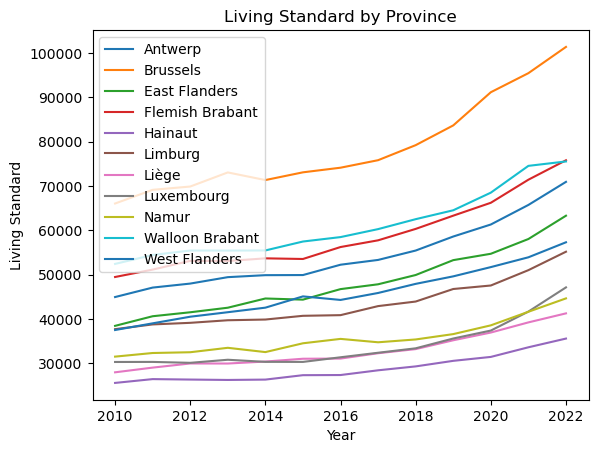

In [21]:
import matplotlib.pyplot as plt

province_data = selected_columns.groupby('Province')

for province, group in province_data:
    plt.plot(
        group['Year'], group['Living Standard'], label=province)

plt.xlabel('Year')
plt.ylabel('Living Standard')
plt.title('Living Standard by Province')
plt.legend()

plt.show()

We now look in particular at the trend in the province of Liège

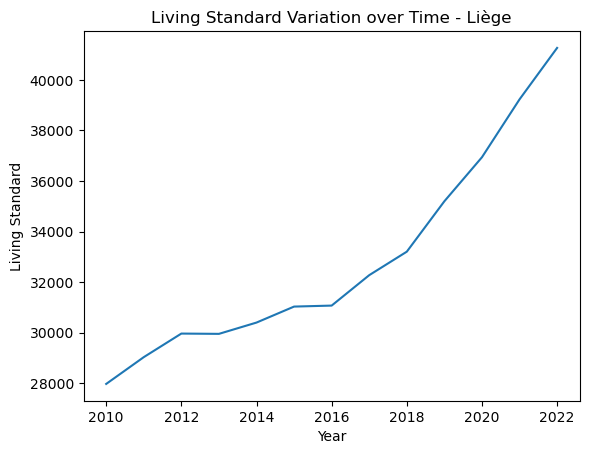

In [22]:
import matplotlib.pyplot as plt

province_data = selected_columns[selected_columns['Province'] == 'Liège']

plt.plot(province_data['Year'], province_data['Living Standard'])
plt.xlabel('Year')
plt.ylabel('Living Standard')
plt.title('Living Standard Variation over Time - Liège')
plt.show()

We now show the level of standard living in 2022 by province

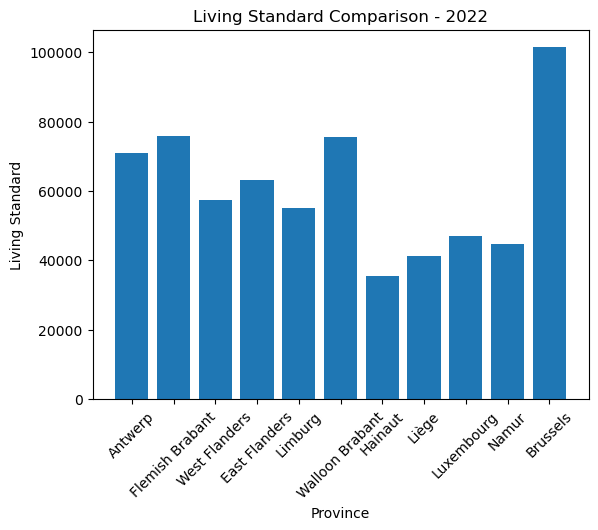

In [23]:
import matplotlib.pyplot as plt

year_data = selected_columns[selected_columns['Year'] == 2022]

living_standard_values = year_data['Living Standard'].tolist()
provinces = year_data['Province'].tolist()

plt.bar(provinces, living_standard_values)
plt.xlabel('Province')
plt.ylabel('Living Standard')
plt.title('Living Standard Comparison - 2022')
plt.xticks(rotation=45)
plt.show()

REGRESSION ANALYSIS

Now we performs a linear regression analysis using the Ordinary Least Squares (OLS) method to explore the relationship between the living standard and the independent variables

In [25]:
import pandas as pd
import statsmodels.api as sm

data = merged_table_1[['Living Standard', 'Unemployment', 'Inflation', 'House_Price', 'Population', 'Health index']]

y = data['Living Standard']
X = data[['Unemployment', 'Inflation', 'House_Price', 'Population', 'Health index']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Living Standard   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.041e+12
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:21:58   Log-Likelihood:                 234.34
No. Observations:                 143   AIC:                            -456.7
Df Residuals:                     137   BIC:                            -438.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1558      0.071     -2.187   

RESULTS

The coefficient for inflation is 1.7237.
The coefficient for the health index is 0.7008. 
The coefficient for house prices is 0.2000.
The coefficient for population is 0.1000. 
This means that, with all other variables held constant, a one-unit increase in a variable is associated with an increase in the living standard equal to the coefficient of the variable

Checking for multicollinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
independent_vars = merged_table_1[['Unemployment', 'Inflation', 'House_Price', 'Population', 'Health index']]
independent_vars = independent_vars.copy()
independent_vars['Constant'] = 1

vif = pd.DataFrame()
vif['Variable'] = independent_vars.columns
vif['VIF'] = [variance_inflation_factor(independent_vars.values, i) for i in range(independent_vars.shape[1])]

print(vif)

       Variable         VIF
0  Unemployment    1.163621
1     Inflation    1.504046
2   House_Price    1.217469
3    Population    1.134697
4  Health index    1.766901
5      Constant  314.871274


All the VIF values are well below 5, ranging from approximately 1.13 to 1.77.
We can conclude that multicollinearity is not a major issue in your model, and the independent variables we have included are not strongly interdependent.

Checking for normality of residuals

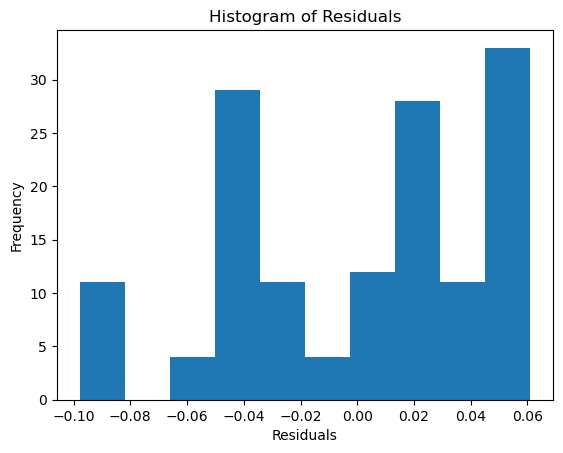

In [27]:
model_result = model.fit()

plt.hist(model_result.resid)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

CLUSTER ANALYSIS

Now we group the data into 3 clusters
We standardised the data using the StandardScaler class to ensure that all variables had the same scale. Next, we applied the K-Means clustering algorithm with 3 clusters using the KMeans class.

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = merged_table_1[['Year', 'Province', 'Population', 'Unemployment', 'House_Price']]

data_for_clustering = data.drop(['Year', 'Province'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

data['Cluster'] = kmeans.labels_

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for cluster_num, center in enumerate(cluster_centers):
    print(f"Cluster {cluster_num}:")
    print("  Centroid:")
    print(f"    Population: {center[0]}")
    print(f"    Unemployment Rate: {center[1]}")
    print(f"    House Price: {center[2]}")
    print("  Data:")
    cluster_data = data[data['Cluster'] == cluster_num]
    for _, row in cluster_data.iterrows():
        print(f"    Year: {row['Year']}, Province: {row['Province']}")
    print()

C:\Users\zenip\.conda\envs\DataManagement1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zenip\.conda\envs\DataManagement1\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 0:
  Centroid:
    Population: 16944.222222222223
    Unemployment Rate: 0.04136047734517192
    House Price: 249826.85185185185
  Data:
    Year: 2010, Province: Antwerp
    Year: 2011, Province: Antwerp
    Year: 2012, Province: Antwerp
    Year: 2013, Province: Antwerp
    Year: 2014, Province: Antwerp
    Year: 2015, Province: Antwerp
    Year: 2016, Province: Antwerp
    Year: 2017, Province: Antwerp
    Year: 2018, Province: Antwerp
    Year: 2019, Province: Antwerp
    Year: 2020, Province: Antwerp
    Year: 2021, Province: Antwerp
    Year: 2022, Province: Antwerp
    Year: 2010, Province: Flemish Brabant
    Year: 2011, Province: Flemish Brabant
    Year: 2012, Province: Flemish Brabant
    Year: 2013, Province: Flemish Brabant
    Year: 2014, Province: Flemish Brabant
    Year: 2016, Province: Flemish Brabant
    Year: 2017, Province: Flemish Brabant
    Year: 2018, Province: Flemish Brabant
    Year: 2019, Province: Flemish Brabant
    Year: 2020, Province: Flemish B

C:\Users\zenip\AppData\Local\Temp\ipykernel_54584\1477852706.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


To carry out a descriptive statistics analysis, we calculated the mean, median and standard deviation of the three variables for each cluster

In [31]:
import pandas as pd

cluster_data_grouped = data.groupby('Cluster')

cluster_statistics = cluster_data_grouped.agg({'Population': ['mean', 'median', 'std'],
                                               'Unemployment': ['mean', 'median', 'std'],
                                               'House_Price': ['mean', 'median', 'std']})

for cluster_num, statistics in cluster_statistics.iterrows():
    print(f"Cluster {cluster_num}:")
    print(f"  Mean:")
    print(f"    Population: {statistics['Population']['mean']:.2f}")
    print(f"    Unemployment: {statistics['Unemployment']['mean']:.2f}")
    print(f"    House Price: {statistics['House_Price']['mean']:.2f}")
    print(f"  Median:")
    print(f"    Population: {statistics['Population']['median']:.2f}")
    print(f"    Unemployment: {statistics['Unemployment']['median']:.2f}")
    print(f"    House Price: {statistics['House_Price']['median']:.2f}")
    print(f"  Standard deviation:")
    print(f"    Population: {statistics['Population']['std']:.2f}")
    print(f"    Unemployment: {statistics['Unemployment']['std']:.2f}")
    print(f"    House Price: {statistics['House_Price']['std']:.2f}")
    print()

Cluster 0:
  Mean:
    Population: 16944.22
    Unemployment: 0.04
    House Price: 249826.85
  Median:
    Population: 16694.50
    Unemployment: 0.04
    House Price: 245500.00
  Standard deviation:
    Population: 4832.16
    Unemployment: 0.01
    House Price: 42881.85

Cluster 1:
  Mean:
    Population: 9948.20
    Unemployment: 0.14
    House Price: 385696.67
  Median:
    Population: 10431.00
    Unemployment: 0.15
    House Price: 370000.00
  Standard deviation:
    Population: 2431.06
    Unemployment: 0.04
    House Price: 50776.10

Cluster 2:
  Mean:
    Population: 7166.68
    Unemployment: 0.08
    House Price: 186360.47
  Median:
    Population: 5963.00
    Unemployment: 0.08
    House Price: 170000.00
  Standard deviation:
    Population: 3925.22
    Unemployment: 0.03
    House Price: 52812.61



This is the visualisation of the 3 clusters
The population variable is represented by the size of the dot

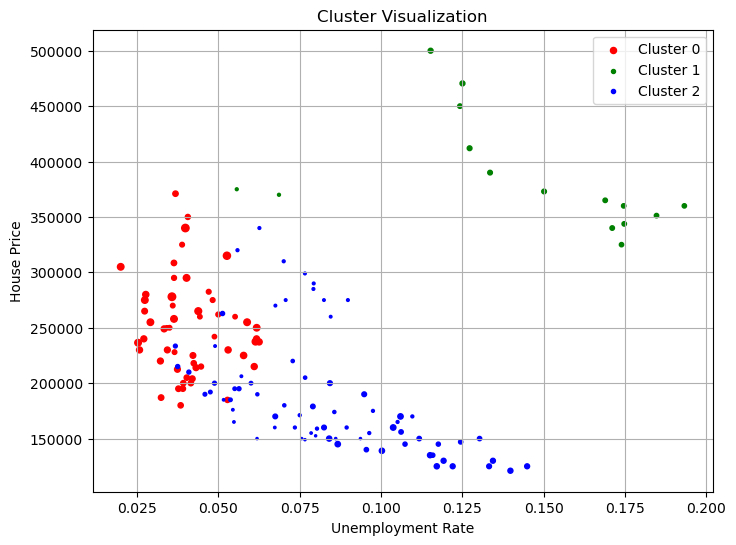

In [32]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))
for cluster_num, color in enumerate(colors):
    cluster_data = data[data['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Unemployment'], cluster_data['House_Price'], s=cluster_data['Population'] / 1000, color=color, label=f"Cluster {cluster_num}")

plt.xlabel('Unemployment Rate')
plt.ylabel('House Price')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)

plt.show()

MAP VISUALISATION

We proceed with a visualisation of a Folium Map

First we set up all the data and functions

In [33]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
print(selected_columns.columns)

Index(['Year', 'Province', 'Living Standard'], dtype='object')


In [36]:
import pandas as pd

features = provinces
provinces_df = pd.DataFrame(features)
provinces_df.head()

,0
0,Antwerp
1,Flemish Brabant
2,West Flanders
3,East Flanders
4,Limburg


In [37]:
provinces_df = pd.DataFrame(features)
print(provinces_df.head())

                 0
0          Antwerp
1  Flemish Brabant
2    West Flanders
3    East Flanders
4          Limburg


In [38]:
import pandas as pd

features = features
provinces_df = pd.DataFrame(features)
provinces_df.head()

,0
0,Antwerp
1,Flemish Brabant
2,West Flanders
3,East Flanders
4,Limburg


In [39]:
print(provinces)

['Antwerp', 'Flemish Brabant', 'West Flanders', 'East Flanders', 'Limburg', 'Walloon Brabant', 'Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Brussels']


In [40]:
print(provinces_df.columns)

RangeIndex(start=0, stop=1, step=1)


In [41]:
living_standards = pd.read_csv(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\province.csv")

In [42]:
print(living_standards.columns)

Index(['Year', 'Province', 'Living Standard'], dtype='object')


In [43]:
print(provinces_df.columns)

RangeIndex(start=0, stop=1, step=1)


In [44]:
print("provinces_df columns:", provinces_df.columns)
print("provinces_df sample data:")
print(provinces_df.head())

print("living_standards columns:", living_standards.columns)
print("living_standards sample data:")
print(living_standards.head())

provinces_df columns: RangeIndex(start=0, stop=1, step=1)
provinces_df sample data:
                 0
0          Antwerp
1  Flemish Brabant
2    West Flanders
3    East Flanders
4          Limburg
living_standards columns: Index(['Year', 'Province', 'Living Standard'], dtype='object')
living_standards sample data:
   Year Province  Living Standard
0  2010  Antwerp     44942.753152
1  2011  Antwerp     47076.939533
2  2012  Antwerp     47978.860080
3  2013  Antwerp     49428.189718
4  2014  Antwerp     49876.056396


The heatmap on the map represents the living standards data, with higher values indicating higher living standards in the corresponding provinces.

In [45]:
import folium
from folium import plugins
import pandas as pd

living_standards = pd.read_csv(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\province.csv")

geojson_path = r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\belgium-with-regions_.geojson"
provinces = folium.GeoJson(geojson_path)

features = provinces.data['features']

provinces_df = pd.json_normalize(features)

provinces_df['Province'] = provinces_df['properties.name']

merged_data = provinces_df.merge(living_standards, on='Province')

map_center = [50.5039, 4.4699]
belgium_map = folium.Map(location=map_center, tiles="Stamen Terrain", zoom_start=5)

heat_data = [
    [point[1], point[0]]  
    for polygon in provinces.data['features']
    for coordinates in polygon['geometry']['coordinates']
    for point in coordinates[0]
]

plugins.HeatMap(heat_data).add_to(belgium_map)

belgium_map

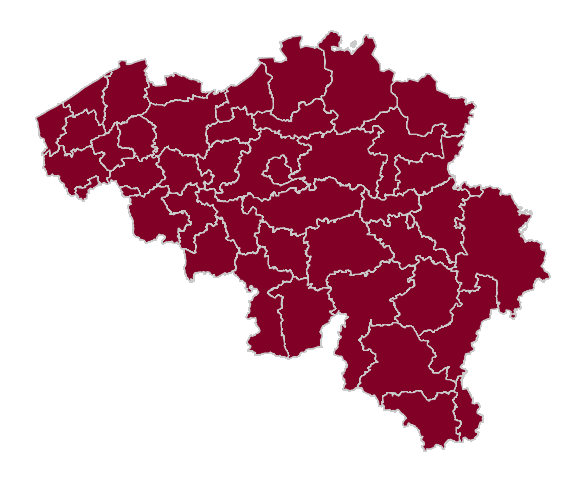

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

provinces = gpd.read_file(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\belgium-with-regions_.geojson")

living_standards = pd.read_csv(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\province.csv")

provinces['Temp'] = 1
living_standards['Temp'] = 1

merged_data = provinces.merge(living_standards, on='Temp')

merged_data = merged_data.drop(columns='Temp')

fig, ax = plt.subplots(figsize=(8, 6))
merged_data.plot(column='Living Standard', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_axis_off()
plt.show()


In [47]:
import pandas as pd
import geopandas as gpd

provinces = gpd.read_file(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\belgium-with-regions_.geojson")

living_standards = pd.read_csv(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\province.csv")

provinces['Province'] = provinces['name']

provinces = pd.merge(provinces, living_standards[['Province']], on='Province', how='left')

print(provinces)

      id      name  density                     path  \
0   5793     Aalst        0     /world/Belgium/Aalst   
1   5794   Antwerp        0   /world/Belgium/Antwerp   
2   5794   Antwerp        0   /world/Belgium/Antwerp   
3   5794   Antwerp        0   /world/Belgium/Antwerp   
4   5794   Antwerp        0   /world/Belgium/Antwerp   
..   ...       ...      ...                      ...   
74  5828  Turnhout        0  /world/Belgium/Turnhout   
75  5829  Verviers        0  /world/Belgium/Verviers   
76  5830    Veurne        0    /world/Belgium/Veurne   
77  5831    Virton        0    /world/Belgium/Virton   
78  5832   Waremme        0   /world/Belgium/Waremme   

                                             geometry  Province  
0   MULTIPOLYGON (((3.74694 50.90781, 3.75116 50.9...     Aalst  
1   MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...   Antwerp  
2   MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...   Antwerp  
3   MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...   Antwerp

In [48]:
print("Columns in living_standards:")
print(living_standards.columns)

print("\nColumns in provinces:")
print(provinces.columns)

Columns in living_standards:
Index(['Year', 'Province', 'Living Standard'], dtype='object')

Columns in provinces:
Index(['id', 'name', 'density', 'path', 'geometry', 'Province'], dtype='object')


In [49]:
print(provinces.head())
print(living_standards.head())

     id     name  density                    path  \
0  5793    Aalst        0    /world/Belgium/Aalst   
1  5794  Antwerp        0  /world/Belgium/Antwerp   
2  5794  Antwerp        0  /world/Belgium/Antwerp   
3  5794  Antwerp        0  /world/Belgium/Antwerp   
4  5794  Antwerp        0  /world/Belgium/Antwerp   

                                            geometry Province  
0  MULTIPOLYGON (((3.74694 50.90781, 3.75116 50.9...    Aalst  
1  MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...  Antwerp  
2  MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...  Antwerp  
3  MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...  Antwerp  
4  MULTIPOLYGON (((4.21758 51.37389, 4.21786 51.3...  Antwerp  
   Year Province  Living Standard
0  2010  Antwerp     44942.753152
1  2011  Antwerp     47076.939533
2  2012  Antwerp     47978.860080
3  2013  Antwerp     49428.189718
4  2014  Antwerp     49876.056396


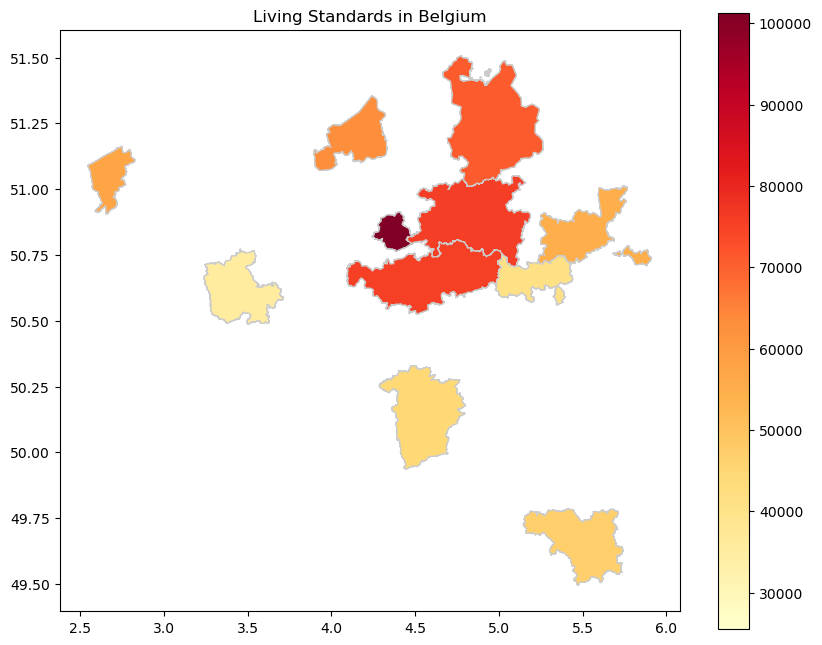

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


provinces = gpd.read_file(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\belgium-with-regions_.geojson")

living_standards = pd.read_csv(r"C:\Users\zenip\OneDrive\Desktop\Data Management\Project Massimo\province.csv")

province_mapping = {
    'Bruxelles-Capitale - Brussel-Hoofdstad': 'Brussels',
    'Aalst': 'East Flanders',
    'Antwerp': 'Antwerp',
    'Arlon': 'Luxembourg',
    'Ath': 'Hainaut',
    'Bastogne': 'Luxembourg',
    'Brugge': 'West Flanders',
    'Charleroi': 'Hainaut',
    'Dendermonde': 'East Flanders',
    'Diksmuide': 'West Flanders',
    'Dinant': 'Namur',
    'Eeklo': 'East Flanders',
    'Gent': 'East Flanders',
    'Halle-Vilvoorde': 'Flemish Brabant',
    'Hasselt': 'Limburg',
    'Huy': 'Liège',
    'Ieper': 'West Flanders',
    'Kortrijk': 'West Flanders',
    'Leuven': 'Flemish Brabant',
    'Liège': 'Liège',
    'Maaseik': 'Limburg',
    'Marche-en-Famenne': 'Luxembourg',
    'Mechelen': 'Antwerp',
    'Mons': 'Hainaut',
    'Mouscron': 'Hainaut',
    'Namur': 'Namur',
    'Neufchâteau': 'Luxembourg',
    'Nivelles': 'Walloon Brabant',
    'Oostende': 'West Flanders',
    'Oudenaarde': 'East Flanders',
    'Philippeville': 'Namur',
    'Roeselare': 'West Flanders',
    'Sint-Niklaas': 'East Flanders',
    'Soignies': 'Hainaut',
    'Thuin': 'Hainaut',
    'Tielt': 'West Flanders',
    'Tongeren': 'Limburg',
    'Tournai': 'Hainaut',
    'Turnhout': 'Antwerp',
    'Verviers': 'Liège',
    'Veurne': 'West Flanders',
    'Virton': 'Luxembourg',
    'Waremme': 'Liège'
}



inverted_mapping = {v: k for k, v in province_mapping.items()}

living_standards['Province'] = living_standards['Province'].map(inverted_mapping)


merged_data = provinces.merge(living_standards, left_on='name', right_on='Province')

fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Living Standard', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#ax.set_xlim([merged_data.total_bounds[0], merged_data.total_bounds[2]])
#ax.set_ylim([merged_data.total_bounds[1], merged_data.total_bounds[3]])

ax.set_title("Living Standards in Belgium")

plt.show()

DATA MODELLING

We calculate the trend for the Living Standard so that we can predict the value of the Living Standard for each province for the year 2023.

We are averaging the historical values of the target variable 'Living Standard' for each province and determining a trend based on the average difference of the historical values from the average. We are therefore generating future values of the target variable using this trend.

In [51]:
import pandas as pd
import numpy as np

province_input_data = {}

for province in merged_table_1['Province'].unique():
    province_data = merged_table_1[merged_table_1['Province'] == province]
    
    target = province_data['Living Standard']
    
    mean_target = target.mean()
    
    target_diff = target - mean_target
    
    trend = target_diff.mean()
    
    future_target = mean_target + trend
    
    input_data = pd.DataFrame({
        'Province': [province],
        'Population': [province_data['Population'].iloc[-1]],
        'Unemployment': [province_data['Unemployment'].iloc[-1]],
        'House_Price': [province_data['House_Price'].iloc[-1]],
        'Consumer price index': [province_data['Consumer price index'].iloc[-1]],
        'Inflation': [province_data['Inflation'].iloc[-1]],
        'Health index': [province_data['Health index'].iloc[-1]]
    })
    
    input_data['Living Standard'] = future_target
    
    province_input_data[province] = input_data

input_data_combined = pd.concat(province_input_data.values(), ignore_index=True)

print(input_data_combined)


           Province  Population  Unemployment  House_Price  \
0           Antwerp       28280      0.039851       340000   
1   Flemish Brabant       14999      0.036815       371000   
2     West Flanders       22080      0.027391       275000   
3     East Flanders       21987      0.019973       305000   
4           Limburg       10787      0.035970       270000   
5   Walloon Brabant        4317      0.055652       375000   
6           Hainaut       14949      0.105991       170000   
7             Liège       11772      0.084294       200000   
8        Luxembourg        3349      0.048982       233500   
9             Namur        5546      0.072859       220000   
10         Brussels       12559      0.115249       500000   

    Consumer price index  Inflation  Health index  Living Standard  
0                 123.03   0.095938        122.59     54361.523909  
1                 123.03   0.095938        122.59     58839.248856  
2                 123.03   0.095938        122.5

Now, using a linear regression model, we calculate the expected value of the Living Standard for each province for 2023

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression

province_models = {}

for province in merged_table_1['Province'].unique():
    province_data = merged_table_1[merged_table_1['Province'] == province]
    
    X = province_data[['Population', 'Unemployment', 'House_Price', 'Consumer price index', 'Inflation', 'Health index']]
    y = province_data['Living Standard']
    
    model = LinearRegression()
    model.fit(X, y)
    
    province_models[province] = model

for province, model in province_models.items():
    input_data = input_data_combined[input_data_combined['Province'] == province]
    X_pred = input_data[['Population', 'Unemployment', 'House_Price', 'Consumer price index', 'Inflation', 'Health index']]
    
    predictions = model.predict(X_pred)
    
    print("Forecasts for the province", province + ":")
    for i, prediction in enumerate(predictions):
        year = 2023 + i
        print("Forecast for", year, ":", prediction)


Forecasts for the province Antwerp:
Forecast for 2023 : 70913.91221732707
Forecasts for the province Flemish Brabant:
Forecast for 2023 : 75785.81282458597
Forecasts for the province West Flanders:
Forecast for 2023 : 57293.914709477016
Forecasts for the province East Flanders:
Forecast for 2023 : 63284.6161930505
Forecasts for the province Limburg:
Forecast for 2023 : 55164.612993569666
Forecasts for the province Walloon Brabant:
Forecast for 2023 : 75517.60905719487
Forecasts for the province Hainaut:
Forecast for 2023 : 35580.79898948279
Forecasts for the province Liège:
Forecast for 2023 : 41263.103328881094
Forecasts for the province Luxembourg:
Forecast for 2023 : 47120.81039116232
Forecasts for the province Namur:
Forecast for 2023 : 44640.50561580703
Forecasts for the province Brussels:
Forecast for 2023 : 101341.79713770618


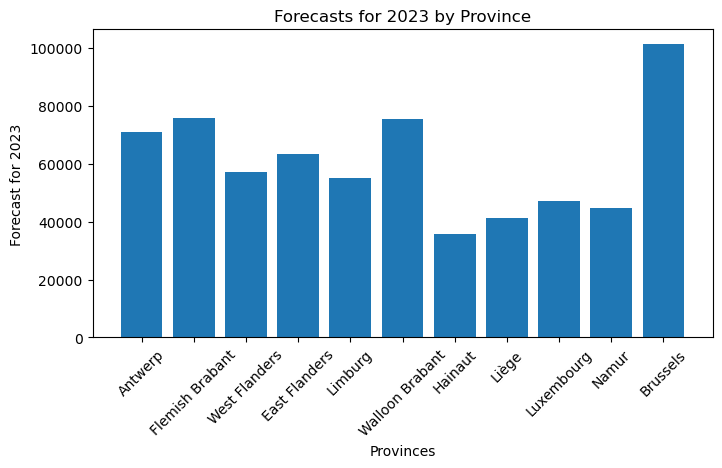

In [9]:
import matplotlib.pyplot as plt

provinces = ['Antwerp', 'Flemish Brabant', 'West Flanders', 'East Flanders', 'Limburg',
             'Walloon Brabant', 'Hainaut', 'Liège', 'Luxembourg', 'Namur', 'Brussels']
forecasts_2023 = [70913.91221732707, 75785.81282458597, 57293.914709477016, 63284.6161930505,
                  55164.612993569666, 75517.60905719487, 35580.79898948279, 41263.103328881094,
                  47120.81039116232, 44640.50561580703, 101341.79713770618]

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(provinces, forecasts_2023)

ax.set_xlabel('Provinces')
ax.set_ylabel('Forecast for 2023')
ax.set_title('Forecasts for 2023 by Province')

plt.xticks(rotation=45)

plt.show()


